In [1]:
import importlib
import numpy as np
import cv2
from PIL import Image
from IPython.display import display

import shapedata
importlib.reload(shapedata)

<module 'shapedata' from '/home/yegor/Projects/interactive-intelligence/emergent-lang/shapedata.py'>

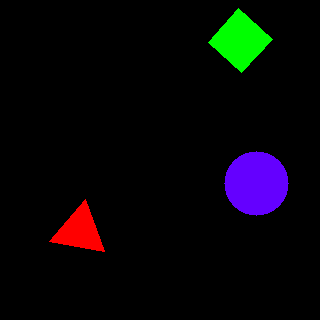

In [2]:
images = np.zeros((8, 320, 320, 3), np.uint8)

shapedata.draw_shapes(images[0], [
    shapedata.Shape('triangle', (255, 0, 0)),
    shapedata.Shape('square', (0, 255, 0)),
    shapedata.Shape('circle', (100, 0, 255))
])

Image.fromarray(images[0])

In [3]:
x1, x2, y = shapedata.create_batch(256, 100)

1.0


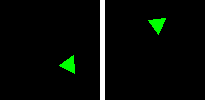

0.0


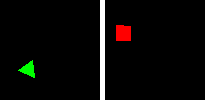

0.0


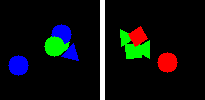

1.0


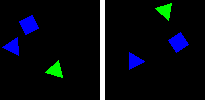

0.0


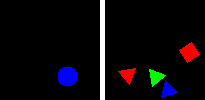

1.0


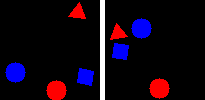

0.0


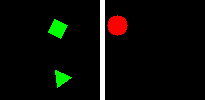

1.0


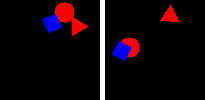

1.0


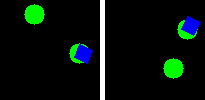

0.0


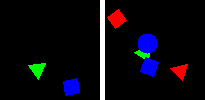

1.0


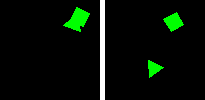

1.0


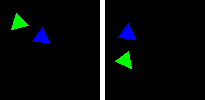

0.0


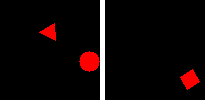

1.0


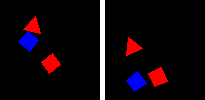

0.0


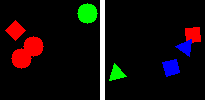

1.0


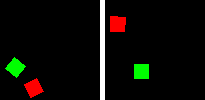

In [4]:
for i in range(16):
    im = Image.fromarray(np.hstack([
        x1[i], np.zeros((x1.shape[1],5,3), np.uint8)+255, x2[i]
    ]))
    print(y[i])
    display(im)